In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#from https://arxiv.org/pdf/1811.07979.pdf
data = """2,1270547945205482; 2,4618580060422963
2,381084474885845; 1,861593655589124
2,629340753424658; 1,4550509818731119
2,8833704337899544; 1,190388972809668
3,143173515981735; 0,985753398791541
3,385656392694064; 0,8438727341389729
3,6281392694063923; 0,7210913897280968
3,8879423515981735; 0,6255947885196376
4,14197203196347; 0,5519259818731119
4,384454908675799; 0,4891710725075531
4,638484589041096; 0,44278700906344426
4,886740867579909; 0,4100453172205438
5,1407705479452055; 0,3773036253776434
5,383253424657534; 0,3527473564954682
5,6372831050228305; 0,3336480362537766
5,891312785388128; 0,31727719033232615
6,133795662100456; 0,29817787009063457
6,387825342465753; 0,28453549848942616
6,636081621004566; 0,27635007552870094
6,895884703196347; 0,26270770392749254
7,138367579908675; 0,25725075528700936
7,380850456621004; 0,25725075528700936
7,6348801369863; 0,2436083836858005
7,888909817351598; 0,2326944864048337
8,13716609589041; 0,24633685800604255
8,391195776255707; 0,24087990936555892
8,627905251141552; 0,24087990936555892
8,887708333333332; 0,2299660120845921
"""

In [5]:
res = pd.read_csv(StringIO(data), sep=";", decimal=",", header=None, names=["energy", "resolution"])

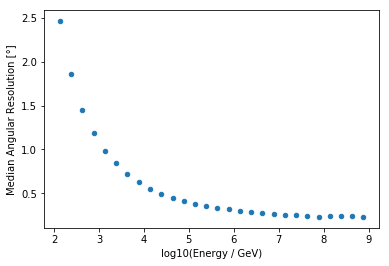

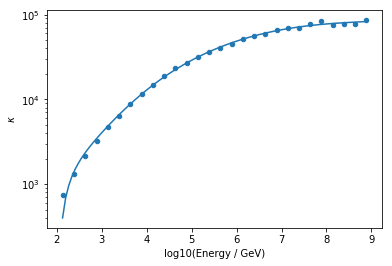

In [6]:
res["kappa"] =  1.38 / np.radians(res.resolution)**2
res.plot.scatter("energy", "resolution")
plt.xlabel("log10(Energy / GeV)")
plt.ylabel("Median Angular Resolution [°]")


res.plot.scatter("energy", "kappa")
params = np.polyfit(res.energy, res.kappa, 5)
xs = np.linspace(res.energy.min(), res.energy.max(), 100)
plt.plot(xs, np.poly1d(params)(xs))
plt.xlabel("log10(Energy / GeV)")
plt.ylabel(r"$\kappa$")
plt.semilogy()
np.savez("angular_reso_tracks.npz",
         kappa=params,
         e_min=10**res.energy.min(),
         e_max=10**res.energy.max()
         )